In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/PM-Narendra-modi.webp')

In [3]:
img.shape

(800, 1200, 3)

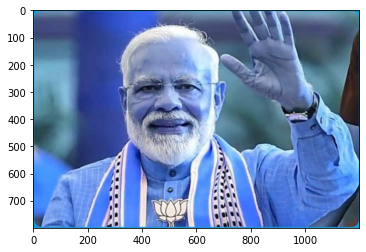

In [4]:
plt.imshow(img)

In [5]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(800, 1200)

In [6]:
gray

array([[159, 159, 159, ..., 158, 158, 158],
       [159, 159, 159, ..., 158, 158, 158],
       [159, 159, 159, ..., 158, 158, 158],
       ...,
       [157, 157, 157, ..., 158, 158, 158],
       [157, 157, 157, ..., 158, 159, 159],
       [157, 157, 157, ..., 158, 159, 159]], dtype=uint8)

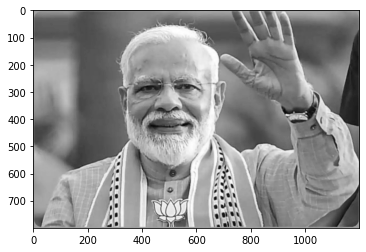

In [7]:
plt.imshow(gray,cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [9]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces
(x,y,w,h)=faces[0]

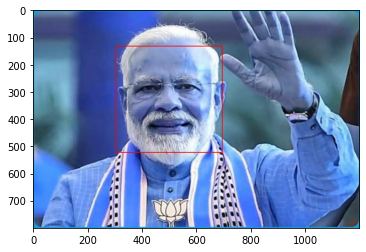

In [10]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [11]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

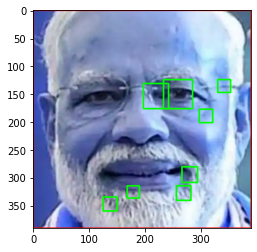

In [12]:
plt.imshow(roi_color,cmap='gray')

# Function to generate cropped images

In [13]:
def get_cropped_image_if_2_eyes(image_path):
#     print("Image path is",image_path)
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

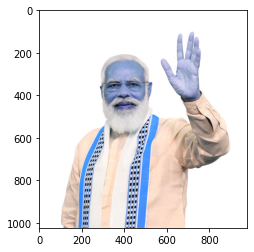

In [14]:
original_image=cv2.imread('./test_images/DSC_0849-979x1024.jpg')
plt.imshow(original_image)

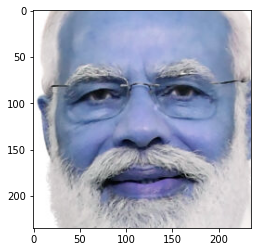

In [15]:
cropped_image=get_cropped_image_if_2_eyes('./test_images/DSC_0849-979x1024.jpg')
plt.imshow(cropped_image)

# Generate cropped images for all the folders and store in cropped folder

In [16]:
path_to_data='.\dataset'
path_to_cropped_data='.\dataset\cropped'
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir() and entry.name!='cropped':
        img_dirs.append(entry.path)


In [17]:
print(img_dirs)

['.\\dataset\\amit_shah', '.\\dataset\\jaishankar', '.\\dataset\\narendra_modi']


In [18]:
import shutil
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [19]:
cropped_image_dirs = []
leader_file_names_dict = {}
for dir in img_dirs:
    count=1
    leader_name=dir.split('\\')[-1]
    print(leader_name)
    leader_file_names_dict[leader_name]=[]
    
    
    for entry in os.scandir(dir):
#         print("Entry path is",entry.path)
        # If image extension is .gif, then continue
        if entry.path.endswith(".gif"):
            continue
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + "/"+leader_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)

            cropped_file_name = leader_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            leader_file_names_dict[leader_name].append(cropped_file_path)
            count += 1

amit_shah
Generating cropped images in folder:  .\dataset\cropped/amit_shah
jaishankar
Generating cropped images in folder:  .\dataset\cropped/jaishankar
narendra_modi
Generating cropped images in folder:  .\dataset\cropped/narendra_modi


In [20]:
leader_file_names_dict

{'amit_shah': ['.\\dataset\\cropped/amit_shah/amit_shah1.png',
  '.\\dataset\\cropped/amit_shah/amit_shah2.png',
  '.\\dataset\\cropped/amit_shah/amit_shah3.png',
  '.\\dataset\\cropped/amit_shah/amit_shah4.png',
  '.\\dataset\\cropped/amit_shah/amit_shah5.png',
  '.\\dataset\\cropped/amit_shah/amit_shah6.png',
  '.\\dataset\\cropped/amit_shah/amit_shah7.png',
  '.\\dataset\\cropped/amit_shah/amit_shah8.png',
  '.\\dataset\\cropped/amit_shah/amit_shah9.png',
  '.\\dataset\\cropped/amit_shah/amit_shah10.png',
  '.\\dataset\\cropped/amit_shah/amit_shah11.png',
  '.\\dataset\\cropped/amit_shah/amit_shah12.png',
  '.\\dataset\\cropped/amit_shah/amit_shah13.png',
  '.\\dataset\\cropped/amit_shah/amit_shah14.png',
  '.\\dataset\\cropped/amit_shah/amit_shah15.png',
  '.\\dataset\\cropped/amit_shah/amit_shah16.png',
  '.\\dataset\\cropped/amit_shah/amit_shah17.png',
  '.\\dataset\\cropped/amit_shah/amit_shah18.png',
  '.\\dataset\\cropped/amit_shah/amit_shah19.png',
  '.\\dataset\\cropped/amit

# Wavelet Transform

In [21]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

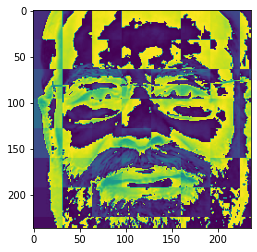

In [22]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har)

In [23]:
# Creating number for each person
class_dict = {}
c = 0
for leader in leader_file_names_dict:
    class_dict[leader] = c
    c += 1
print(class_dict)


{'amit_shah': 0, 'jaishankar': 1, 'narendra_modi': 2}


In [49]:
# Vertically Stack Color image and wavelet transformed image
X, y = [], []
for celebrity_name, training_files in leader_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [50]:
print(len(X))

156


In [51]:
X[0]

array([[212],
       [214],
       [192],
       ...,
       [  2],
       [166],
       [209]], dtype=uint8)

Training model

In [52]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Print the dimensions of X_train and X_test
# Transform the data to two dimensions using StandardScaler
X_train = np.array(X_train).reshape(len(X_train),4096)
y_train = np.array(y_train).reshape(len(y_train),)
X_test = np.array(X_test).reshape(len(X_test),4096)
y_test = np.array(y_test).reshape(len(y_test),)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9230769230769231

In [54]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.87      0.93        15
           2       1.00      0.86      0.92         7

    accuracy                           0.92        39
   macro avg       0.95      0.91      0.92        39
weighted avg       0.93      0.92      0.92        39



GridSearch to try out different models, different parameters and find the best combination

In [55]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [56]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [57]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.931522,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.744203,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.888406,{'logisticregression__C': 1}


In [58]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [59]:
best_estimators['svm'].score(X_test,y_test)

0.9487179487179487

In [60]:
best_estimators['random_forest'].score(X_test,y_test)

0.8717948717948718

In [61]:
best_estimators['logistic_regression'].score(X_test,y_test)

1.0

In [62]:
best_clf = best_estimators['svm']

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[17,  0,  0],
       [ 2, 13,  0],
       [ 0,  0,  7]], dtype=int64)

Text(69.0, 0.5, 'Truth')

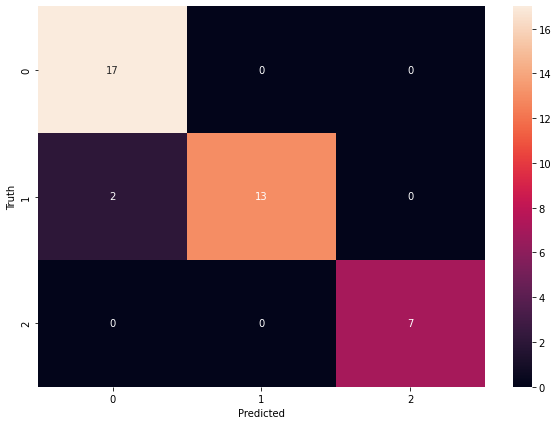

In [64]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
class_dict

{'amit_shah': 0, 'jaishankar': 1, 'narendra_modi': 2}

Save the trained model

In [66]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\Jitin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


['saved_model.pkl']

Save class dictionary


In [67]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))